# Deep Convolutional Generative Adverserial Network

### Imports

In [1]:
import numpy as np
import torchvision
import torchvision.transforms as transforms
import torchvision.utils as vutils
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from matplotlib import pyplot as plt

# Import GAN modules
import sys
sys.path.append('./../GAN')

from gan import Gan
from discriminator import Discriminator
from generator import Generator

## Hyperparametere

In [2]:
# Latent vector size
ls_size = 100

# Training batch size
batch_size = 32

# Feature map size for generator and discriminator
fm_size = 64

# Number of channels in image
num_img_chan = 3

# Amount of Convolutional layers
num_layers = 3

# Number of worker threads
num_workers = 2

### Load dataset
The dataset contains 2879 pictures of abstract art *😮‍💨😮‍💨*

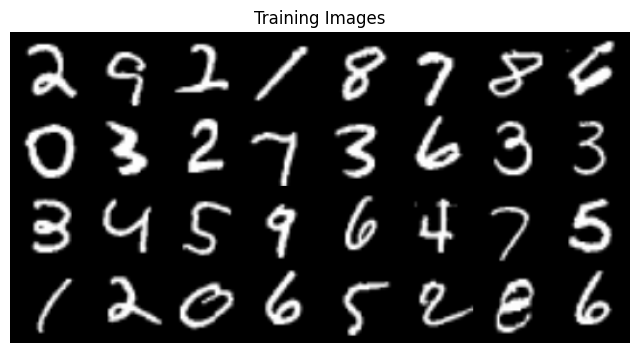

In [3]:
datasets = ['mnist', 'abstract-art']
set_type = datasets[0]


if set_type == datasets[0]:
    transform = transforms.Compose([transforms.Resize(fm_size), transforms.CenterCrop(fm_size), 
                                    transforms.ToTensor(), transforms.Normalize((0.5,), (0.5,))]) 
    dataset = torchvision.datasets.MNIST(root=".", train=True, download=True, transform=transform)
    
elif set_type == datasets[1]:
    transform = transforms.Compose([transforms.Resize(fm_size), transforms.CenterCrop(fm_size),
                                   transforms.ToTensor(), transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),])
    dataset = ImageFolder(root="../abstract-art/Abstract_gallery", transform=transform)
    num_img_chan = 3
    
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True, num_workers=num_workers)

# Set batch
real_batch = next(iter(dataloader))

## Display images
plt.figure(figsize=(8, 8))
plt.axis("off")
plt.title("Training Images")
plt.imshow(np.transpose(vutils.make_grid(real_batch[0][:64], padding=2, normalize=True).cpu(),(1,2,0)))

## Hyperparametere

initialized
in: 1024, out: 512
in: 512, out: 256
in: 256, out: 128
batches: 1875
Train stage: adversarial D Loss: 0.000868 G Loss: 7.534386 D(Real): 0.999873 D(Fake1)/D(Fake2): 0.000741/0.000554.


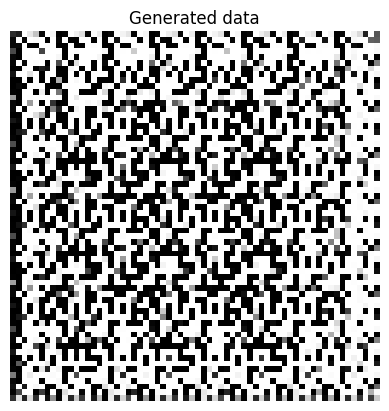

Train stage: adversarial D Loss: 0.000300 G Loss: 9.015905 D(Real): 0.999910 D(Fake1)/D(Fake2): 0.000210/0.000125.


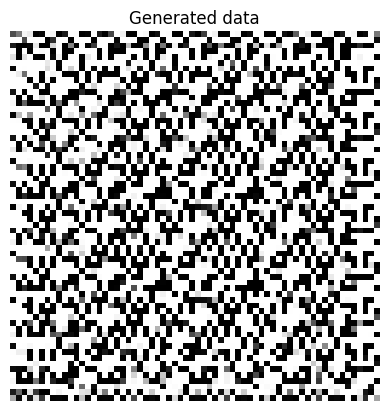

Train stage: adversarial D Loss: 0.000497 G Loss: 8.240982 D(Real): 0.999920 D(Fake1)/D(Fake2): 0.000417/0.000265.


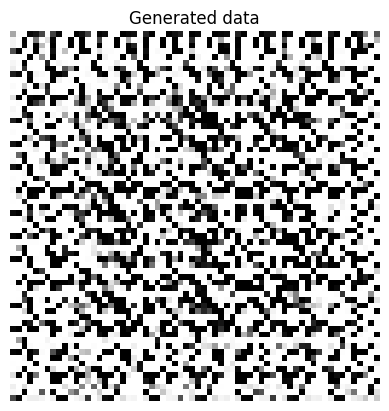

Train stage: adversarial D Loss: 0.000719 G Loss: 8.253630 D(Real): 0.999933 D(Fake1)/D(Fake2): 0.000651/0.000262.


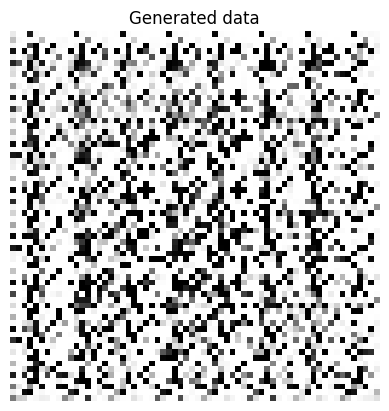

KeyboardInterrupt: 

In [4]:
# Initiate Discriminator and Discriminator
generator = Generator(ls_size, fm_size, num_img_chan, num_layers)
discriminator = Discriminator(fm_size, num_img_chan)

# Initiate Generative Adverserial Network
# gan = Gan(generator, discriminator, dataloader, batch_size, ls_size)
gan = Gan(generator, discriminator, dataloader, batch_size, ls_size)
gan.train()